# TP1.KNN

# Jeux de données

In [ ]:
from sklearn.datasets import fetch_mldata
#dead

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
#1
print(mnist) 
print(mnist.data) 
print(mnist.target) 
len(mnist.data) 
help(len)     
print(mnist.data.shape) 
print(mnist.target.shape) 
mnist.data[0] 
mnist.data[0][1] 
mnist.data[:,1] 
mnist.data[:100] 

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

classe : 5


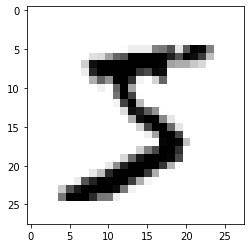

In [ ]:
#2
from sklearn import datasets 
import matplotlib.pyplot as plt 
#mnist = datasets.fetch_mldata('MNIST original') 
images = mnist.data.reshape((-1, 28, 28))
print("classe : "+str(mnist.target[0])) 
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")
#plt.imshow(images[0],interpolation="nearest") 
plt.show()

gaumart@insa-11292:~$ python3 -c "from sklearn import datasets;import matplotlib.pyplot as plt;mnist = datasets.fetch_openml('mnist_784');images = mnist.data.reshape((-1, 28, 28));plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation='nearest');plt.show()"


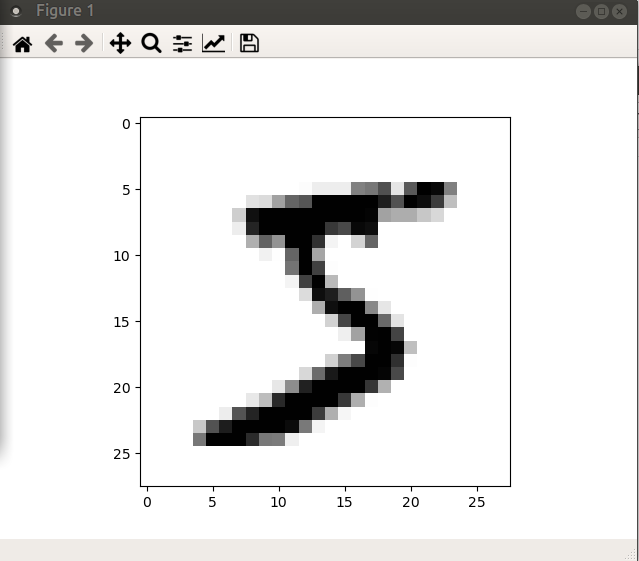

classe : 5


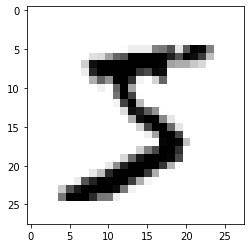

classe : 5


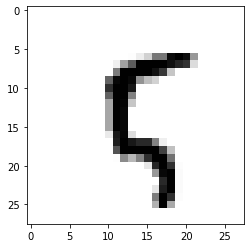

classe : 1


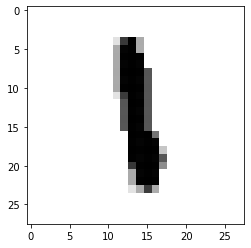

classe : 8


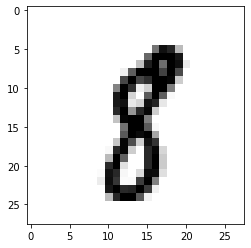

classe : 2


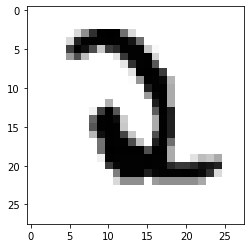

classe : 3


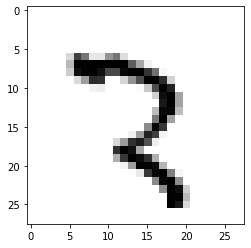

classe : 9


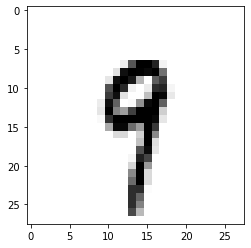

classe : 4


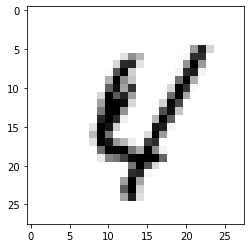

classe : 9


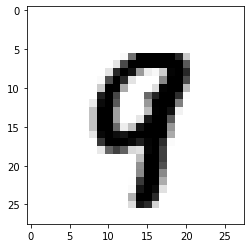

classe : 9


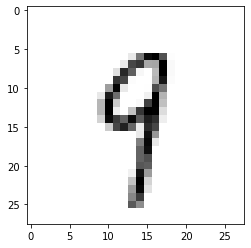

In [ ]:
#3
for i in range(0,10):

  print("classe : "+str(mnist.target[i*100])) 
  plt.imshow(images[i*100],cmap=plt.cm.gray_r,interpolation="nearest")
#plt.imshow(images[0],interpolation="nearest") 
  plt.show()

In [ ]:
#Prendre un échantillon de données appelé data avec une taillede5000 exemples à l’aide de la fonction np.random.randint(70000, size=5000). 
import numpy as np

rand = np.random.randint(70000, size=5000)
data5000 = mnist.data[rand]
label5000 = mnist.target[rand]
print(data5000.shape)
print(label5000.shape)


(5000, 784)
(5000,)


In [ ]:
#Diviser la base de données à 80% pour l’apprentissage (training) et à 20% pour les tests, 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data5000, label5000, train_size=0.8)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4000, 784)
(1000, 784)
(4000,)
(1000,)


In [ ]:
%%time
#Entrainer un classifieur k-nn avec k = 10 sur le jeu de données chargé.

from sklearn.neighbors import KNeighborsClassifier as KNNs
from time import time

#training
start=time()
knn = KNNs(n_neighbors=10,p=2)
knn.fit(xtrain,ytrain)
end=time()
print("training",end-start,"s")

#prediction
start=time()
ypredict=knn.predict(xtest)
end=time()
print("predict",end-start,"s")

training 0.37387990951538086 s
predict 6.726114273071289 s
CPU times: user 7.13 s, sys: 19.7 ms, total: 7.15 s
Wall time: 7.36 s


(1000,)

real class : 3
predict class : 3


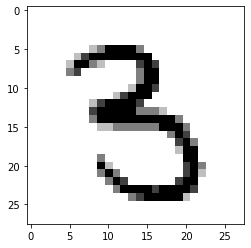

CPU times: user 7.81 s, sys: 2.39 ms, total: 7.81 s
Wall time: 7.82 s


In [ ]:
%%time
#Afficher la classe de l’image 4 et sa classe prédite.

ypredict=knn.predict(xtest)
print(str(ypredict.shape)+'\n')

print("real class : "+str(ytest[3]))
print("predict class : "+str(ypredict[3]))
im = xtest[3].reshape((28, 28)) 
plt.imshow(im,cmap=plt.cm.gray_r,interpolation="nearest")
#plt.imshow(images[0],interpolation="nearest") 
plt.show()

In [ ]:
#Afficher le score sur l’échantillon de test 
predictscore = knn.score(xtest,ytest)
print(predictscore)

0.93


Quel est le taux d'erreur sur vos données d'apprentissage ? Est-ce normal ? 
Oui

In [ ]:
from sklearn.model_selection import KFold
xdata=mnist.data
ydata=mnist.target
kf= KFold(n_splits=10,shuffle=True)
print(kf)
n=kf.get_n_splits(xdata)
print(n)
for train_index, test_index in kf.split(xdata):
  print("TRAIN:", train_index,train_index.shape, "TEST:", test_index,test_index.shape)
  X_train, X_test = xdata[train_index], xdata[test_index]
  y_train, y_test = ydata[train_index], ydata[test_index]

KFold(n_splits=10, random_state=None, shuffle=True)
10
TRAIN: [    0     1     2 ... 69997 69998 69999] (63000,) TEST: [   21    40    44 ... 69969 69976 69977] (7000,)
TRAIN: [    0     1     2 ... 69997 69998 69999] (63000,) TEST: [    3    10    17 ... 69950 69964 69971] (7000,)
TRAIN: [    0     1     2 ... 69996 69998 69999] (63000,) TEST: [    7    15    16 ... 69984 69993 69997] (7000,)
TRAIN: [    0     1     2 ... 69996 69997 69998] (63000,) TEST: [   20    33    42 ... 69980 69991 69999] (7000,)
TRAIN: [    0     2     3 ... 69997 69998 69999] (63000,) TEST: [    1     5    57 ... 69957 69961 69973] (7000,)
TRAIN: [    0     1     3 ... 69997 69998 69999] (63000,) TEST: [    2     6    11 ... 69955 69968 69987] (7000,)
TRAIN: [    0     1     2 ... 69997 69998 69999] (63000,) TEST: [   14    25    28 ... 69970 69978 69988] (7000,)
TRAIN: [    0     1     2 ... 69997 69998 69999] (63000,) TEST: [    4     8    12 ... 69983 69994 69996] (7000,)
TRAIN: [    0     1     2 ... 699

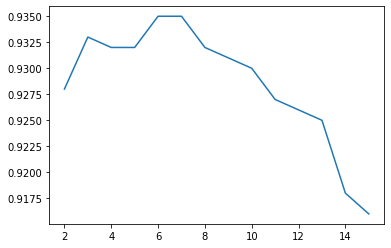

In [ ]:
#Faire varier le nombre de voisins (k) de 2 jusqu’à 15 et afficher le score. Quel est le k optimal ? 

k_=[]
score_=[]

for k in range(2,16):

  knn=KNNs(n_neighbors=k,p=2)
  knn.fit(xtrain,ytrain)
  score = knn.score(xtest,ytest)
  score_.append(score)
  k_.append(k)

plt.plot(k_,score_)








In [ ]:
print(score_.index(max(score_))+2)
print(score_[4])
print(score_[5])

6
0.935
0.935


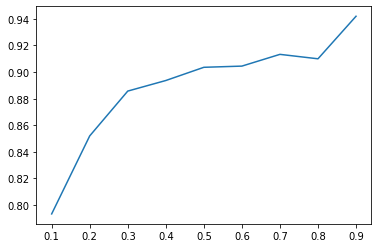

In [ ]:
#Faites varier le pourcentage des échantillons (training et test) et affichez le score. Quel est le pourcentage remarquable ?

k = 10  #résultat dépend de k

p_=[]
score_=[]

for p in range(1,10):

  xtrain, xtest, ytrain, ytest = train_test_split(data5000, label5000, train_size=p/10)
  knn = KNNs(n_neighbors=k,p=2)
  knn.fit(xtrain,ytrain)
  score = knn.score(xtest,ytest)
  score_.append(score)
  p_.append(p/10)

plt.plot(p_,score_)




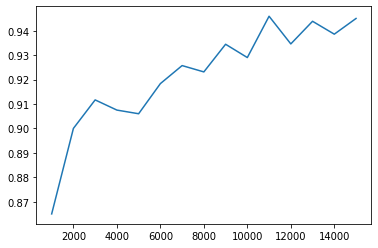

In [ ]:
#Faites varier la taille de l’échantillon training et affichez la précision. Qu'est-ce que vous remarquez 

t_=[]
score_=[]

for t in range(1000,15001,1000):
  rand = np.random.randint(70000, size=t)
  datat = mnist.data[rand]
  labelt = mnist.target[rand]
  xtrain, xtest, ytrain, ytest = train_test_split(datat, labelt, train_size=0.8)
  knn = KNNs(n_neighbors=10,p=2)
  knn.fit(xtrain,ytrain)
  score = knn.score(xtest,ytest)
  t_.append(t)
  score_.append(score)

plt.plot(t_,score_)



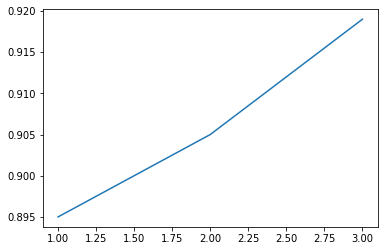

In [ ]:
#Faites varier les types de distances (p). Quelle est la meilleure distance ? 

from sklearn.neighbors import KNeighborsClassifier as KNNs

p_=[]
score_=[]

rand = np.random.randint(70000, size=5000)
datat = mnist.data[rand]
labelt = mnist.target[rand]
xtrain, xtest, ytrain, ytest = train_test_split(datat, labelt, train_size=0.8)

for p in range(1,4):
  
  knn = KNNs(n_neighbors=10,p=p)
  knn.fit(xtrain,ytrain)
  score = knn.score(xtest,ytest)
  p_.append(p)
  score_.append(score)

plt.plot(p_,score_)



In [ ]:
#Fixez n_job à 1 puis à -1 et calculez le temps de chacun. 
from sklearn.neighbors import KNeighborsClassifier as KNNs
from time import time
import numpy as np
from sklearn.model_selection import train_test_split

rand = np.random.randint(70000, size=50000)
datat = mnist.data[rand]
labelt = mnist.target[rand]
xtrain, xtest, ytrain, ytest = train_test_split(datat, labelt, train_size=0.8)

start = time()
knn = KNNs(n_neighbors=10,p=2,n_jobs=1)
knn.fit(xtrain,ytrain)
end=time()
startp = time()
score = knn.score(xtest,ytest)
endp=time()
print("n_job 1")
print("time training",end-start,"s")
print("time testing",endp-startp,"s")
print("score",score)

print("\n")

start=time()
knn = KNNs(n_neighbors=10,p=2,n_jobs=-1)
knn.fit(xtrain,ytrain)
end=time()
startp = time()
score = knn.score(xtest,ytest)
endp=time()
print("n_job -1")
print("time training",end-start,"s")
print("time testing",endp-startp,"s")
print("score",score)

n_job 1
time training 12.635108947753906 s
time testing 635.7610442638397 s
score 0.9642


n_job -1
time training 11.788974523544312 s
time testing 413.5073835849762 s
score 0.9642
